## **Tic-Tac-Toe Classification by Multiple NN and Keras**

##Read file and import library

In [1]:
# for coloab only
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = '/content/gdrive/My Drive/CE - ML &Deep Learning/Deep Learning/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # predefined plotting style

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


# If you are on CoLab, copy tic-tac-toe.csv to the default dir '/content' before running this code.
# Download tic-tac-toe.csv: https://drive.google.com/file/d/1WD4ibv0qqWpP4QoNpBAztx2fNylmZWyv/view?usp=sharing
# file_name = root_dir + 'tic-tac-toe.csv' 
# Import dataset
# dataset = pd.read_csv(file_name, names = '1 2 3 4 5 6 7 8 9 class'.split())

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
dataset = pd.read_csv(url, names = '1 2 3 4 5 6 7 8 9 class'.split())
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9:10].values

In [3]:
dataset

,1,2,3,4,5,6,7,8,9,class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


##LabelEncoder

In [4]:
# Encode categorical variables as numeric
labelencoder_X = LabelEncoder()
for i in range(9):
    X[:, i] = labelencoder_X.fit_transform(X[:, i])
print(X[0])

# Encode target categorical variable
labelencoder_y = LabelEncoder()
y[:, 0] = labelencoder_y.fit_transform(y[:, 0])
print(y[0])

[2 2 2 2 1 1 2 1 1]
[1]


##OneHot

In [0]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(X)
# X = enc.transform(X).toarray()

##Split data

In [0]:
# Train/test split
# !!! DO NOT change test_size, random_state and stratify !!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X_train.shape

(766, 9)

In [8]:
num_class_label = np.unique(np.array(y_train), return_counts=True)
print('Train shape: ', X_train.shape)
print('class label 0 : ', num_class_label[1][0])
print('class label 1 : ', num_class_label[1][1])

print('\n======================================================\n')

num_class_label = np.unique(np.array(y_test), return_counts=True)
print('Test shape: ', X_test.shape)
print('class label 0 : ', num_class_label[1][0])
print('class label 1 : ', num_class_label[1][1])

Train shape:  (766, 9)
class label 0 :  265
class label 1 :  501


Test shape:  (192, 9)
class label 0 :  67
class label 1 :  125


##Init neural network architecture

In [0]:
def create_model(neurons=(100, 100), lr=0.06, momentum=0.9):
    model = Sequential()

    model.add(Dense(neurons[0], kernel_initializer='uniform', activation='relu', input_shape=(X_train.shape[1:]), use_bias=True))
    model.add(Dense(neurons[1], kernel_initializer='uniform', activation='relu', use_bias=True))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid', use_bias=True))


    optimizer = SGD(lr=0.06, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [10]:
nnet = create_model()
nnet.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [11]:
history_callback = nnet.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1, validation_data=(X_test, y_test))

Train on 766 samples, validate on 192 samples
Epoch 1/100
766/766 [==============================] - 1s 659us/sample - loss: 0.6532 - acc: 0.6540 - val_loss: 0.6428 - val_acc: 0.6510
Epoch 2/100
766/766 [==============================] - 0s 244us/sample - loss: 0.6349 - acc: 0.6540 - val_loss: 0.6237 - val_acc: 0.6510
Epoch 3/100
766/766 [==============================] - 0s 256us/sample - loss: 0.6262 - acc: 0.6580 - val_loss: 0.6192 - val_acc: 0.6875
Epoch 4/100
766/766 [==============================] - 0s 284us/sample - loss: 0.6191 - acc: 0.6488 - val_loss: 0.6148 - val_acc: 0.6667
Epoch 5/100
766/766 [==============================] - 0s 235us/sample - loss: 0.5964 - acc: 0.7154 - val_loss: 0.5909 - val_acc: 0.6719
Epoch 6/100
766/766 [==============================] - 0s 251us/sample - loss: 0.5630 - acc: 0.7245 - val_loss: 0.6565 - val_acc: 0.6615
Epoch 7/100
766/766 [==============================] - 0s 246us/sample - loss: 0.5347 - acc: 0.7493 - val_loss: 0.6015 - val_acc: 0.

## Training accuracy and Training Loss Graph 

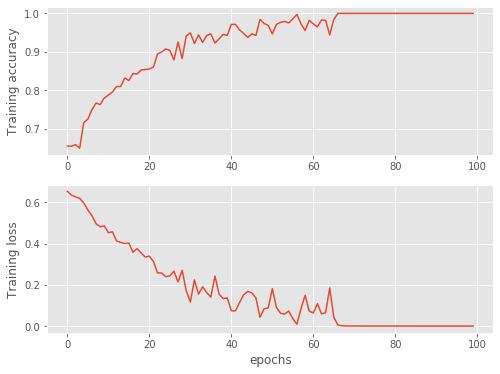

In [12]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history_callback.history['acc']
loss = history_callback.history['loss']
ax1.plot(acc, label=nnet)
ax2.plot(loss, label=nnet)
    
ax1.set_ylabel('Training accuracy')
ax2.set_ylabel('Training loss')
ax2.set_xlabel('epochs')
#ax1.legend()
#ax2.legend()
plt.show()

In [13]:
score = nnet.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predicting the test set results
y_pred = nnet.predict_classes(X_test)

192/192 [==============================] - 0s 87us/sample - loss: 0.0889 - acc: 0.9844
Test loss: 0.08890617617483561
Test accuracy: 0.984375


##Confusion Matrix

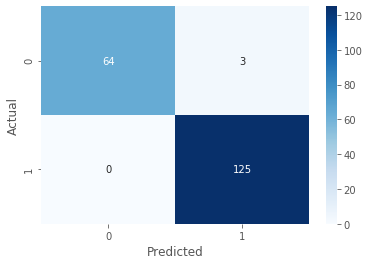

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(list(y_test.reshape(-1)), list(y_pred.reshape(-1)))
ax = sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=[0, 1], yticklabels=[0, 1], cmap="Blues")
bottom, top = ax.get_ylim()
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

##AUC & ROC

Logistic: ROC AUC=0.997


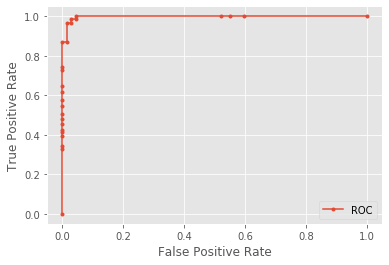

In [15]:
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = nnet.predict_proba(X_test)
lr_auc = roc_auc_score(list(y_test.reshape(-1)), lr_probs)


# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(list(y_test.reshape(-1)), lr_probs)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ROC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

##GridSearchCV

In [0]:
param_grid = {
    'neurons' : [(8, 8), (16, 16)],
    'lr' : [0.01, 0.1],
    'momentum' : [0.8, 0.9],
    'batch_size' : [8, 16],
    'epochs' : [40],
}

In [0]:
model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=16, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print(grid_result.best_score_, grid_result.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean} ({stdev}) with: {param}')

##Average test accuracy rate in 10 times

In [0]:
scores = []
for i in range(12):
  nnet = create_model()
  nnet.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)

  score = nnet.evaluate(X_test, y_test, verbose=1)
  print('Test loss ', i, ' : ', score[0])
  print('Test accuracy', i, ' : ', score[1])
  scores.append(score[1])
print('Max accuracy rate :', np.array(scores).max())
print('Min accuracy rate :', np.array(scores).min())